In [2]:
%matplotlib inline
import glob
import sys
import shutil
import os
import matplotlib.pyplot as plt
from mintpy import workflow, view, tsview, plot_network, plot_transection, plot_coherence_matrix

In [4]:
cd /home/fw/data/hyp3_insar/ascending

/home/fw/data/hyp3_insar/ascending


In [20]:
cd /home/fw/data/hyp3_insar

/home/fw/data/hyp3_insar


In [ ]:
!smallbaselineApp.py -g ../hyp3.cfg

In [28]:
!smallbaselineApp.py ../hyp3.cfg --dostep load_data

MintPy release version v1.3.0-63, release date 2021-07-04
--RUN-at-2021-07-06 15:30:18.358681--
Current directory: /home/fw/data/hyp3_insar/ascending
Run routine processing with smallbaselineApp.py on steps: ['load_data']
Remaining steps: ['modify_network', 'reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: hyp3
Go to work directory: /home/fw/data/hyp3_insar/ascending
read custom template file: /home/fw/data/hyp3_insar/hyp3.cfg
update default template based on input custom template
    mintpy.load.unwFile: /mnt/i/hyp3_downloads/p81f1048_10x2_2/\*/\*unw_phase_clip.tif --> /mnt/i/hyp3_downloads/p81f1048_10x2_2/*/*unw_phase_clip.tif
    mintpy.load.corFile: /mnt/i/hyp3_downloads/p81f1048_10x2_2/\*/\*corr_clip.tif --> /mnt/i/hyp3_do

In [32]:
!generate_mask.py inputs/geometryGeo.h5 waterMask -M 0.5 -o inputs/waterMask.h5

input geometry file: inputs/geometryGeo.h5
read inputs/geometryGeo.h5 waterMask
create initial mask with the same size as the input file and all = 1
all pixels with nan value = 0
exclude pixels with value > 0.5
delete exsited file: inputs/waterMask.h5
create HDF5 file: inputs/waterMask.h5 with w mode
create dataset /mask of bool       in size of (2120, 4330)         with compression=None
finished writing to inputs/waterMask.h5
time used: 00 mins 0.1 secs.


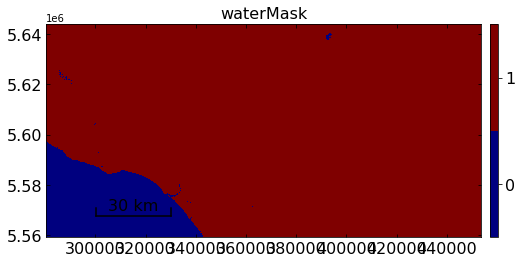

In [21]:
view.main('inputs/waterMask.h5 --noverbose'.split())

In [17]:
# !modify_network.py inputs/ifgramStack.h5 --reset
!smallbaselineApp.py --dostep modify_network

MintPy release version v1.3.0-63, release date 2021-07-04
--RUN-at-2021-07-07 13:16:41.117724--
Current directory: /home/fw/data/hyp3_insar/ascending
Run routine processing with smallbaselineApp.py on steps: ['modify_network']
Remaining steps: ['reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Go to work directory: /home/fw/data/hyp3_insar/ascending
read default template file: /home/fw/data/hyp3_insar/ascending/smallbaselineApp.cfg


******************** step - modify_network ********************
Input data seems to be geocoded. Lookup file not needed.
generate /home/fw/data/hyp3_insar/ascending/waterMask.h5 from /home/fw/data/hyp3_insar/ascending/inputs/geometryGeo.h5 for conveniency
['/home/fw/data/hyp3_insar/ascending/waterMask.h5'] exist

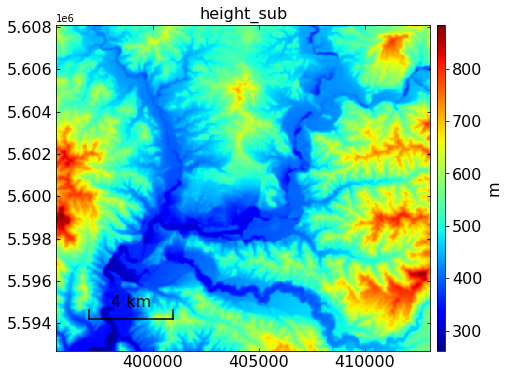

In [23]:
view.main('inputs/geometryGeo.h5 height --sub-x 2876 3317 --sub-y 896 1281 --noverbose'.split())

In [37]:
!subset.py inputs/ifgramStack.h5 -o inputs/ifgramStackPoroa.h5 -x 2876 3317 -y 896 1281
!subset.py inputs/geometryGeo.h5 -o inputs/geometryGeoPoroa.h5 -x 2876 3317 -y 896 1281
!subset.py inputs/waterMask.h5 -o inputs/waterMaskPoroa.h5 -x 2876 3317 -y 896 1281

------------------------------
subset ifgramStack file: inputs/ifgramStack.h5 ...
data   range in (x0,y0,x1,y1): (0, 0, 4330, 2120)
subset range in (x0,y0,x1,y1): (2876, 896, 3317, 1281)
data   range in (W, N, E, S): (280400.0, 5643920.0, 453600.0, 5559120.0)
subset range in (W, N, E, S): (395440.0, 5608080.0, 413080.0, 5592680.0)
writing >>> inputs/ifgramStackPoroa.h5
update LENGTH, WIDTH, Y/XMAX
update/add SUBSET_XMIN/YMIN/XMAX/YMAX: 3760/5128/4201/5513
update Y/X_FIRST
--------------------------------------------------
grab dataset structure from ref_file: inputs/ifgramStack.h5
create HDF5 file: inputs/ifgramStackPoroa.h5 with w mode
create dataset  : bperp       of float32                   in size of (277,)               with compression = None
create dataset  : coherence   of float32                   in size of (277, 385, 441)      with compression = None
create dataset  : date        of |S8                       in size of (277, 2)             with compression = None
create dat

In [53]:
# view.main('inputs/ifgramStack.h5 -v -15 15 --noverbose'.split())

In [53]:
!spatial_filter.py inputs/ifgramStackPoroa.h5 unwrapPhase -o inputs/ifgramStackPoroaDD.h5  -f double_difference -p 1 12

filtering ifgramStack file: inputs/ifgramStackPoroa.h5 using double_difference filter with local/regional kernel sizes of 1/12
filtering unwrapPhase from ifgramStackPoroa.h5  277/277 ...
create HDF5 file: inputs/ifgramStackPoroaDD.h5 with w mode
create dataset /coherence   of float32    in size of (277, 385, 441)      with compression=None
create dataset /unwrapPhase of float32    in size of (277, 385, 441)      with compression=None
create dataset /bperp       of float32    in size of (277,)     with compression=None
create dataset /date        of |S8        in size of (277, 2)   with compression=None
create dataset /dropIfgram  of bool       in size of (277,)     with compression=None
finished writing to inputs/ifgramStackPoroaDD.h5
Done.


In [57]:
# # reset inputs directory
# mv inputs/ inputs_raw/
# mkdir inputs
# !cp inputs_raw/ifgramStackPoroaDD.h5 inputs/ifgramStack.h5
# !cp inputs_raw/geometryGeoPoroa.h5 inputs/geometryGeo.h5
# !cp inputs_raw/waterMaskPoroa.h5 inputs/waterMask.h5
# !cp inputs_raw/*.cfg inputs/

In [63]:
!smallbaselineApp.py --dostep reference_point

MintPy release version v1.3.0-63, release date 2021-07-04
--RUN-at-2021-07-07 14:40:53.675092--
Current directory: /home/fw/data/hyp3_insar/ascending
Run routine processing with smallbaselineApp.py on steps: ['reference_point']
Remaining steps: ['quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Go to work directory: /home/fw/data/hyp3_insar/ascending
read default template file: /home/fw/data/hyp3_insar/ascending/smallbaselineApp.cfg


******************** step - reference_point ********************
Input data seems to be geocoded. Lookup file not needed.

generate_mask.py /home/fw/data/hyp3_insar/ascending/inputs/ifgramStack.h5 --nonzero -o /home/fw/data/hyp3_insar/ascending/maskConnComp.h5 --update
input ifgramStack file: /home/fw/data/hyp3_insar/ascending/in

In [64]:
!smallbaselineApp.py --dostep quick_overview

MintPy release version v1.3.0-63, release date 2021-07-04
--RUN-at-2021-07-07 14:41:19.470104--
Current directory: /home/fw/data/hyp3_insar/ascending
Run routine processing with smallbaselineApp.py on steps: ['quick_overview']
Remaining steps: ['correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Go to work directory: /home/fw/data/hyp3_insar/ascending
read default template file: /home/fw/data/hyp3_insar/ascending/smallbaselineApp.cfg


******************** step - quick_overview ********************
Input data seems to be geocoded. Lookup file not needed.

temporal_average.py /home/fw/data/hyp3_insar/ascending/inputs/ifgramStack.h5 --dataset unwrapPhase -o /home/fw/data/hyp3_insar/ascending/avgPhaseVelocity.h5 --update
output file: /home/fw/data/hyp3_insar/ascending/avgPhaseVeloci

In [65]:
!smallbaselineApp.py --dostep correct_unwrap_error

MintPy release version v1.3.0-63, release date 2021-07-04
--RUN-at-2021-07-07 14:43:38.656163--
Current directory: /home/fw/data/hyp3_insar/ascending
Run routine processing with smallbaselineApp.py on steps: ['correct_unwrap_error']
Remaining steps: ['invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Go to work directory: /home/fw/data/hyp3_insar/ascending
read default template file: /home/fw/data/hyp3_insar/ascending/smallbaselineApp.cfg


******************** step - correct_unwrap_error ********************
phase-unwrapping error correction is OFF.
Go back to directory: /home/fw/data/hyp3_insar/ascending

################################################
   Normal end of smallbaselineApp processing!
################################################
Time used: 00 mins 0.0 secs



In [73]:
!smallbaselineApp.py --dostep invert_network

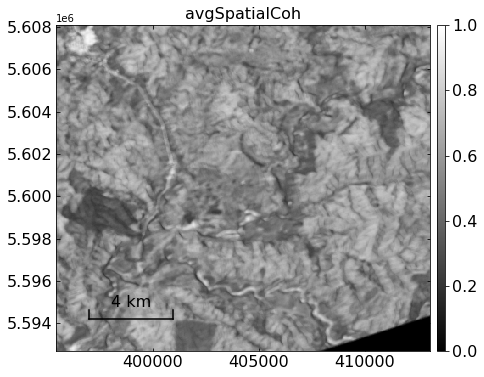

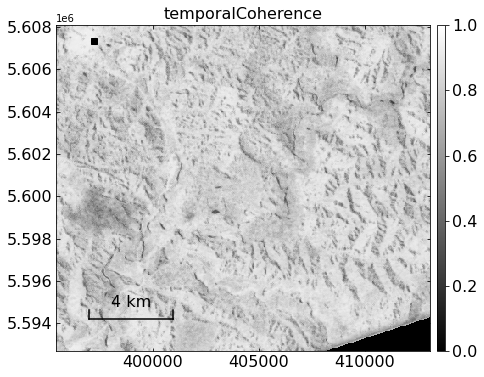

In [73]:
view.main('avgSpatialCoh.h5 --noverbose'.split())
view.main('temporalCoherence.h5 -c gray --noverbose'.split())

In [10]:
cp timeseries.h5 timeseries_ERA5_demErr.h5

In [11]:
!smallbaselineApp.py --dostep velocity

MintPy release version v1.3.0-63, release date 2021-07-04
--RUN-at-2021-07-07 15:28:18.484471--
Current directory: /home/fw/data/hyp3_insar/ascending
Run routine processing with smallbaselineApp.py on steps: ['velocity']
Remaining steps: ['geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Go to work directory: /home/fw/data/hyp3_insar/ascending
read default template file: /home/fw/data/hyp3_insar/ascending/smallbaselineApp.cfg


******************** step - velocity ********************

timeseries2velocity.py /home/fw/data/hyp3_insar/ascending/timeseries_ERA5_demErr.h5 -t /home/fw/data/hyp3_insar/ascending/smallbaselineApp.cfg -o /home/fw/data/hyp3_insar/ascending/velocity.h5 --update
read options from template file: smallbaselineApp.cfg
open timeseries file: timeseries_ERA5_demErr.h5
--------------------------------------------------
dates from input file: 97
['20171130', '20171212', '20171224', '20180105', '20180117', '20180129', '20180210', '201

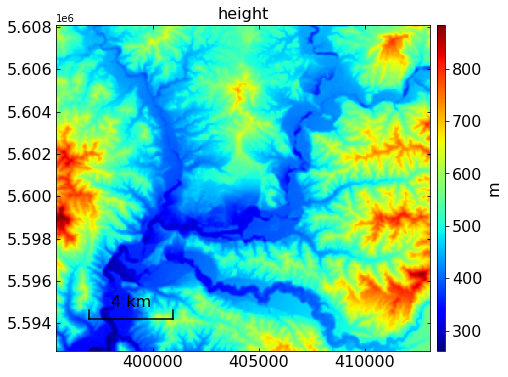

In [18]:
view.main('inputs/geometryGeo.h5 height --noverbose'.split())

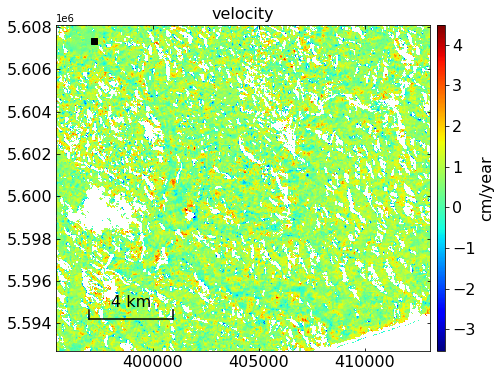

In [14]:
view.main('velocity.h5 velocity --noverbose'.split())

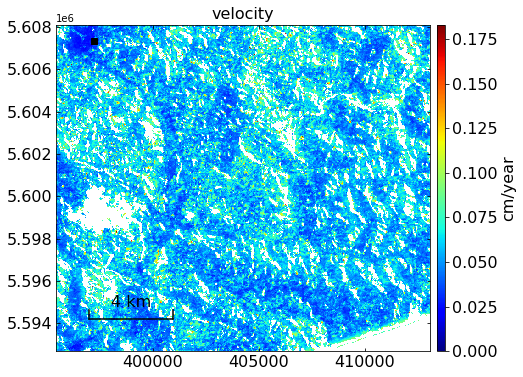

In [16]:
view.main('velocity.h5 velocityStd --noverbose'.split())